In [144]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pandas.tools.plotting import scatter_matrix
from pandas.stats.api import ols
matplotlib.style.use('ggplot')
import statsmodels.formula.api as sm
import statsmodels.stats.api as sms
from sklearn import linear_model
import plotly
from plotly.graph_objs import *

In [145]:
kepler_data = pd.read_csv('Ex01_Kepler_Regression.csv')
kepler_data['planet'] = pd.Categorical(kepler_data.planet).codes
kepler_data.head()

,SemiMajorAxis,Volume,EscapeVelocity,Density,planet,OrbitalPeriod
0,0.662104,10.236030,10.892849,6.072644,7,0.448359
1,11.721498,8.132345,34.080931,0.758931,5,40.447949
2,4.903094,1.538470,58.493158,1.281688,1,10.063035
3,0.817968,8.532505,10.034185,6.129132,7,0.551544
4,27.016293,7.106079,25.796580,2.108022,4,225.690334


In [146]:
kepler_data['SemiMajorAxis'] = kepler_data['SemiMajorAxis'].map(lambda x: x**2)

In [147]:
kepler_data.dtypes

SemiMajorAxis     float64
Volume            float64
EscapeVelocity    float64
Density           float64
planet               int8
OrbitalPeriod     float64
dtype: object

In [148]:
columns = kepler_data.describe(include=['float64']).columns
for col in columns:
    kepler_data[col] = kepler_data[col].apply(lambda x :(x-kepler_data[col].mean())/kepler_data[col].std())
#     kepler_data[col] = kepler_data[col].apply(lambda x :print(x))

In [149]:
kepler_data.head(20)

,SemiMajorAxis,Volume,EscapeVelocity,Density,planet,OrbitalPeriod
0,-0.565747,1.565010,-0.510760,1.311394,7,-0.592566
1,-0.141566,0.898847,0.945673,-1.275073,5,-0.009158
2,-0.492646,-1.189202,2.478995,-1.020619,1,-0.452333
3,-0.565033,1.025563,-0.564692,1.338890,7,-0.591061
4,1.693497,0.573864,0.425337,-0.618398,4,2.692669
5,1.314209,0.055137,0.368077,-0.709507,4,1.047087
6,-0.565600,1.497476,-0.563691,0.681412,7,-0.591811
7,0.800126,0.590200,0.104695,-0.988460,6,2.020357
8,-0.558118,-1.145613,-0.847151,0.414329,2,-0.559461
9,-0.450707,-1.191858,2.481224,-0.989077,1,-0.363744


In [101]:
kepler_data['SemiMajorAxis'] = kepler_data['SemiMajorAxis'].map(lambda x: x**1.5)

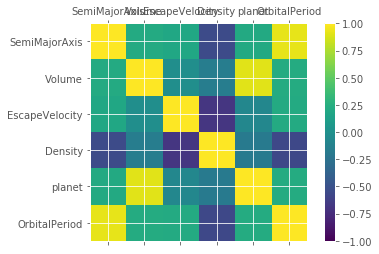

,SemiMajorAxis,Volume,EscapeVelocity,Density,planet,OrbitalPeriod
SemiMajorAxis,1.000000,0.221783,0.193593,-0.539080,0.215873,0.927741
Volume,0.221783,1.000000,-0.015625,-0.153851,0.912129,0.229391
EscapeVelocity,0.193593,-0.015625,1.000000,-0.687354,-0.070401,0.225476
Density,-0.539080,-0.153851,-0.687354,1.000000,-0.178369,-0.565611
planet,0.215873,0.912129,-0.070401,-0.178369,1.000000,0.231997
OrbitalPeriod,0.927741,0.229391,0.225476,-0.565611,0.231997,1.000000


In [150]:
correlations = kepler_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
names = kepler_data.columns
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
correlations

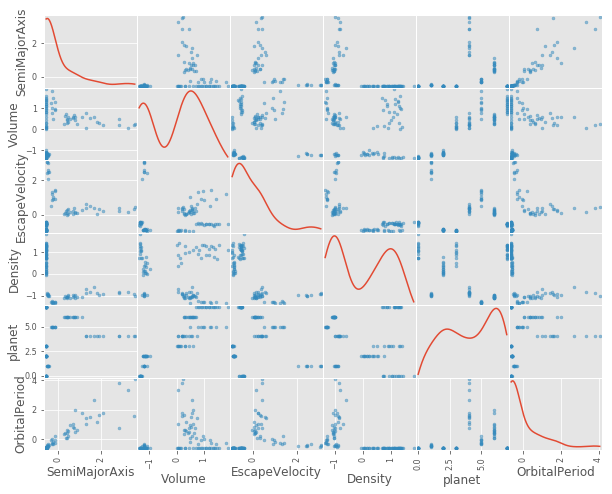

In [151]:
scatter_matrix(kepler_data, diagonal='kde', figsize=(10, 8))
plt.show()

In [152]:
splitend = int(0.8 * len(kepler_data))
kepler_data_shuffled = kepler_data.sample(frac=1)
train, test = kepler_data_shuffled[:splitend], kepler_data_shuffled[splitend:]
x_train = train.ix[:, :-1]
y_train = train.ix[:, -1]
x_test = test.ix[:, :-1]
y_test = test.ix[:, -1]

In [153]:
model1 = sm.ols(formula='OrbitalPeriod~SemiMajorAxis+Volume+EscapeVelocity+Density', data=train).fit()

In [154]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          OrbitalPeriod   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     114.3
Date:                Sat, 01 Apr 2017   Prob (F-statistic):           4.04e-31
Time:                        10:18:08   Log-Likelihood:                -27.559
No. Observations:                  80   AIC:                             65.12
Df Residuals:                      75   BIC:                             77.03
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0360      0.040     -0.910      0.366      -0.115       0.043
SemiMajorAxis      0.8167      0.050     16.469      0.000       0.718       0.916
Volume             0.0154      0.040      0.384      0.702      -0.064       0.095
EscapeVelocity    -0.0144      0.054     -0.266      0.791      -0.122       0.093
Density           -0.0986      0.065     -1.512      0.135      -0.229       0.031
==============================================================================
Omnibus:                       37.081   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              411.537
Skew:                          -0.856   Prob(JB):                     4.32e-90
Kurtosis:                      13.979   Cond. No.                         3.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
predictions1 = model1.predict(x_test)
predictions1

95   -0.559402
43   -0.584656
44    1.266549
68   -0.608355
33    0.314408
16    1.115738
96   -0.510980
8    -0.538170
75    0.635025
90    1.623836
59   -0.154067
41   -0.650518
71   -0.582334
83   -0.554058
82   -0.556353
53    1.553632
7     0.722515
63   -0.580329
86    2.381860
97   -0.608896
dtype: float64

In [156]:
np.mean((y_test - predictions1)**2)**0.5

0.46204007992781349

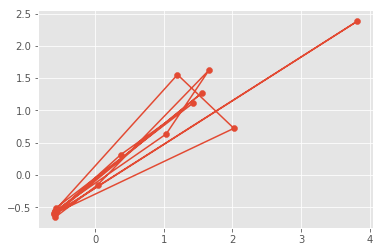

In [157]:
plt.scatter(y_test, predictions1)
plt.plot(y_test, predictions1)
plt.show()

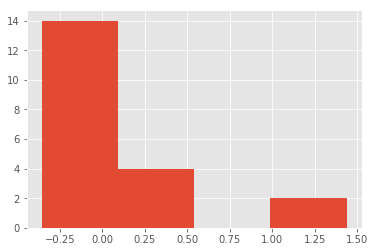

In [182]:
residuals = y_test - predictions1
plt.hist(residuals, bins=4)
plt.show()

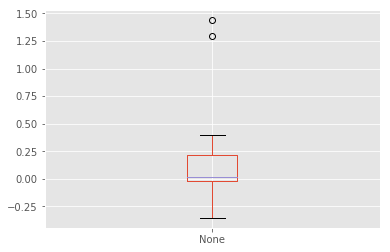

In [159]:
residuals.plot(kind='box')
plt.show()

In [160]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model1.resid, model1.model.exog)
list(zip(name, test))

[('F statistic', 1.947851096671285), ('p-value', 0.026153251609414067)]

## Lasso

In [161]:
alphas_lasso = np.linspace(0.03,0.1,100)
fdf=pd.DataFrame()
model = linear_model.Lasso()
coeff = []
for a in alphas_lasso:
    model.set_params(alpha=a)
    model.fit(x_train, y_train)
    coeff.append(model.coef_)
cdf = pd.DataFrame(coeff, columns=x_train.columns)
adf = pd.DataFrame(alphas_lasso, columns=['alphas'])
fdf = cdf.join(adf)
fdf.head()

,SemiMajorAxis,Volume,EscapeVelocity,Density,planet,alphas
0,0.798040,0.0,0.0,-0.066254,0.007600,0.030000
1,0.797538,0.0,0.0,-0.065808,0.007551,0.030707
2,0.797037,0.0,0.0,-0.065362,0.007501,0.031414
3,0.796536,0.0,0.0,-0.064916,0.007452,0.032121
4,0.796035,0.0,0.0,-0.064469,0.007403,0.032828


In [162]:
trace0 = Scatter(
    x = alphas_lasso,
    y = fdf['SemiMajorAxis'],
    name = 'SemiMajorAxis',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = Scatter(
    x = alphas_lasso,
    y = fdf['Volume'],
    name = 'Volume',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = Scatter(
    x = alphas_lasso,
    y = fdf['EscapeVelocity'],
    name = 'EscapeVelocity',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas_lasso,
    y = fdf['Density'],
    name = 'Density',
    line = dict(
        color = ('rgb(212, 196, 107)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas_lasso,
    y = fdf['planet'],
    name = 'planet',
    line = dict(
        color = ('rgb(187, 122, 44)'),
        width = 4,
        dash = 'dash')
)

data = [trace0, trace1, trace2, trace3, trace4]

# Edit the layout
layout = dict(xaxis = dict(title = 'alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='LassoRegression.html')

'file:///home/user/ml_regression/KeplerDataset/LassoRegression.html'

## LassoCV

In [163]:
lassocv = linear_model.LassoCV(alphas=alphas_lasso, cv=10, max_iter=100000)

In [164]:
lassocv.fit(x_train, y_train)
predictions = lassocv.predict(x_test)
for i, j in zip(x_train.columns, lassocv.coef_):
    print (i, j)

SemiMajorAxis 0.798039869433
Volume 0.0
EscapeVelocity 0.0
Density -0.0662539673598
planet 0.00759968204066


In [165]:
np.mean((y_test - predictions)**2)**0.5

0.48453284582787615

In [166]:
lassocv.alpha_

0.029999999999999999

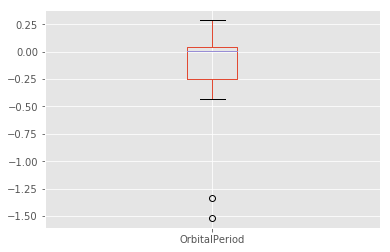

In [167]:
residuals = predictions - y_test
residuals.plot(kind='box')
plt.show()

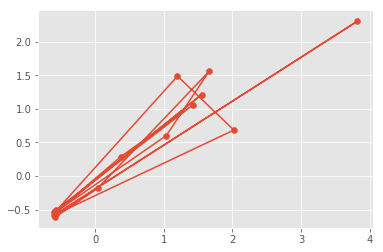

In [168]:
plt.scatter(y_test, predictions)
plt.plot(y_test, predictions)
plt.show()

## Ridge

,SemiMajorAxis,Volume,EscapeVelocity,Density,planet,alphas
0,0.817441,-0.018145,-0.007918,-0.091689,0.015988,0.010000
1,0.816689,-0.017966,-0.008080,-0.092101,0.015948,0.060404
2,0.815941,-0.017790,-0.008241,-0.092510,0.015909,0.110808
3,0.815194,-0.017616,-0.008399,-0.092915,0.015872,0.161212
4,0.814449,-0.017445,-0.008556,-0.093317,0.015835,0.211616


In [185]:
trace0 = Scatter(
    x = alphas_ridge,
    y = fdf['SemiMajorAxis'],
    name = 'SemiMajorAxis',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = Scatter(
    x = alphas_ridge,
    y = fdf['Volume'],
    name = 'Volume',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = Scatter(
    x = alphas_ridge,
    y = fdf['EscapeVelocity'],
    name = 'EscapeVelocity',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas_ridge,
    y = fdf['Density'],
    name = 'Density',
    line = dict(
        color = ('rgb(212, 196, 107)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas_ridge,
    y = fdf['planet'],
    name = 'planet',
    line = dict(
        color = ('rgb(187, 122, 44)'),
        width = 4,
        dash = 'dash')
)

data = [trace0, trace1, trace2, trace3, trace4]

# Edit the layout
layout = dict(xaxis = dict(title = 'alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='RidgeRegression.html')

'file:///home/user/ml_regression/KeplerDataset/RidgeRegression.html'

## RidgeCV

In [177]:
ridgecv = linear_model.RidgeCV(alphas=alphas_ridge, scoring='neg_mean_squared_error')

In [178]:
ridgecv.fit(x_train, y_train)
for i, j in zip(x_train.columns, ridgecv.coef_):
    print (i, j)

SemiMajorAxis 0.78934612556
Volume -0.0125329741454
EscapeVelocity -0.0129900745666
Density -0.105823113548
planet 0.0150422031149


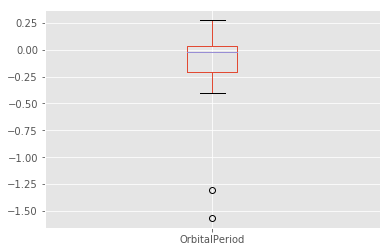

In [173]:
predictions = ridgecv.predict(x_test)
residuals = predictions - y_test
residuals.plot(kind='box')
plt.show()

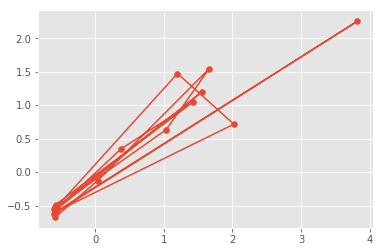

In [183]:
plt.scatter(y_test, predictions)
plt.plot(y_test, predictions)
plt.show()